In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
loan = pd.read_csv("loan.csv")
loan

C:\Users\deepali_mule\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan.shape

(39717, 111)

# Data understanding

In [6]:
nulls = loan.nunique()
nulls[nulls==0]

mths_since_last_major_derog       0
annual_inc_joint                  0
dti_joint                         0
verification_status_joint         0
tot_coll_amt                      0
tot_cur_bal                       0
open_acc_6m                       0
open_il_6m                        0
open_il_12m                       0
open_il_24m                       0
mths_since_rcnt_il                0
total_bal_il                      0
il_util                           0
open_rv_12m                       0
open_rv_24m                       0
max_bal_bc                        0
all_util                          0
total_rev_hi_lim                  0
inq_fi                            0
total_cu_tl                       0
inq_last_12m                      0
acc_open_past_24mths              0
avg_cur_bal                       0
bc_open_to_buy                    0
bc_util                           0
mo_sin_old_il_acct                0
mo_sin_old_rev_tl_op              0
mo_sin_rcnt_rev_tl_op       

In [7]:
loan = loan.drop(columns=nulls[nulls==0].index)

In [8]:
loan.shape

(39717, 57)

In [9]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Drop the columns with null values and not useful for analysis

In [10]:
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

delete columns with minimal data

In [11]:
loan=loan.drop(columns=['url','member_id','emp_title','funded_amnt_inv','pymnt_plan','desc',
                                  'title','zip_code','revol_bal','revol_util','initial_list_status','out_prncp','out_prncp_inv',
                                  'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                                  'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d',
                                  'last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type',
                                  'chargeoff_within_12_mths','delinq_amnt','tax_liens','acc_now_delinq'])

In [12]:
loan.shape

(39717, 26)

In [13]:
loan.head(3)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,27.65,0,Jan-85,1,NaN,NaN,3,0,9,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1.00,0,Apr-99,5,NaN,NaN,3,0,4,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,8.72,0,Nov-01,2,NaN,NaN,2,0,10,0.0


In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   loan_amnt               39717 non-null  int64  
 2   funded_amnt             39717 non-null  int64  
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          39717 non-null  object 
 10  annual_inc              39717 non-null  float64
 11  verification_status     39717 non-null  object 
 12  issue_d                 39717 non-null  object 
 13  loan_status             39717 non-null  object 
 14  purpose                 39717 non-null

# Data Cleaning and Manipulation

In [15]:
loan.term=loan.term.apply(lambda x: int(x.replace('months',''))) #Term as integer
loan.int_rate=loan.int_rate.apply(lambda x: float(x.rstrip('%'))) # Interest rate as float
loan.issue_d=pd.DatetimeIndex(loan.issue_d.apply(lambda x: x.replace('-','-20'))).date #Date

In [16]:
np.number

numpy.number

correct missing data

In [17]:
nulls = loan.isnull().sum()
nulls[nulls>0]

emp_length                 1075
mths_since_last_delinq    25682
mths_since_last_record    36931
pub_rec_bankruptcies        697
dtype: int64

In [18]:
#Drop columns with too many nulls
loan=loan.drop(columns=['mths_since_last_delinq','mths_since_last_record'])

In [19]:
nulls = loan.isnull().sum()
nulls[nulls>0]

emp_length              1075
pub_rec_bankruptcies     697
dtype: int64

In [20]:
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [21]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [22]:
loan

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,1077501,5000,5000,36,10.65,162.87,B,B2,10+ years,RENT,...,credit_card,AZ,27.65,0,Jan-85,1,3,0,9,0.0
1,1077430,2500,2500,60,15.27,59.83,C,C4,< 1 year,RENT,...,car,GA,1.00,0,Apr-99,5,3,0,4,0.0
2,1077175,2400,2400,36,15.96,84.33,C,C5,10+ years,RENT,...,small_business,IL,8.72,0,Nov-01,2,2,0,10,0.0
3,1076863,10000,10000,36,13.49,339.31,C,C1,10+ years,RENT,...,other,CA,20.00,0,Feb-96,1,10,0,37,0.0
4,1075358,3000,3000,60,12.69,67.79,B,B5,1 year,RENT,...,other,OR,17.94,0,Jan-96,0,15,0,38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,36,8.07,78.42,A,A4,4 years,MORTGAGE,...,home_improvement,CO,11.33,0,Nov-90,0,13,0,40,NaN
39713,90665,8500,8500,36,10.28,275.38,C,C1,3 years,RENT,...,credit_card,NC,6.40,1,Dec-86,1,6,0,9,NaN
39714,90395,5000,5000,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,...,debt_consolidation,MA,2.30,0,Oct-98,0,11,0,20,NaN
39715,90376,5000,5000,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,...,other,MD,3.72,0,Nov-88,0,17,0,26,NaN


# Data analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

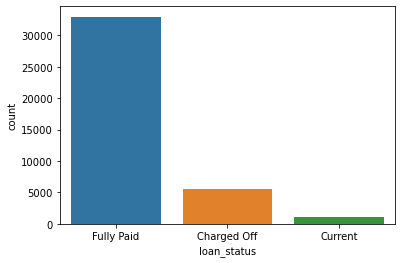

In [23]:
sns.countplot(x = 'loan_status', data = loan)

# Presentation and Recommendations

<AxesSubplot:xlabel='grade', ylabel='count'>

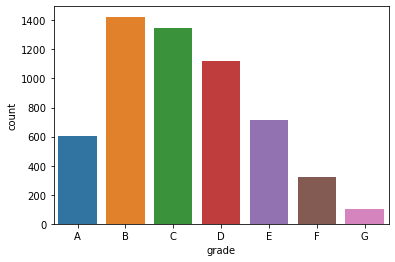

In [24]:
sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

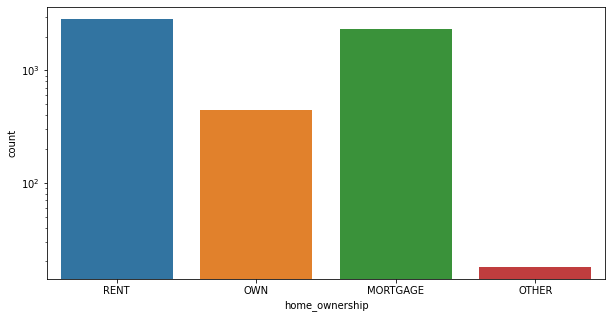

In [25]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='term', ylabel='count'>

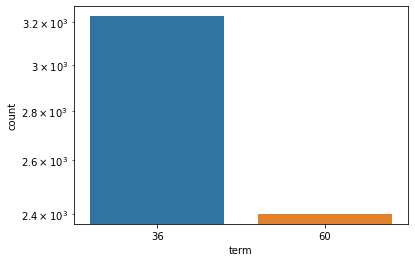

In [26]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='term', data=loan[loan['loan_status']=='Charged Off'])

In [27]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   term                  39717 non-null  int64  
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

<AxesSubplot:xlabel='annual_inc', ylabel='count'>

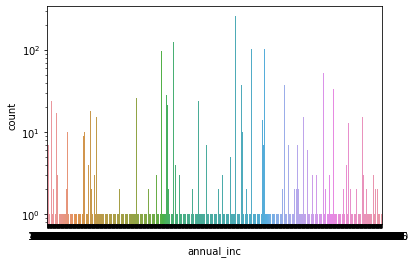

In [28]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='annual_inc', data=loan[loan['loan_status']=='Charged Off'])

In [29]:
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

<AxesSubplot:xlabel='annual_inc', ylabel='count'>

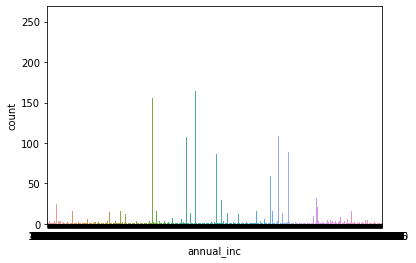

In [30]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x='annual_inc', data=loan[loan['loan_status']=='Charged Off'])

In [31]:
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%','25%-30%'])

<AxesSubplot:xlabel='int_rate_groups', ylabel='count'>

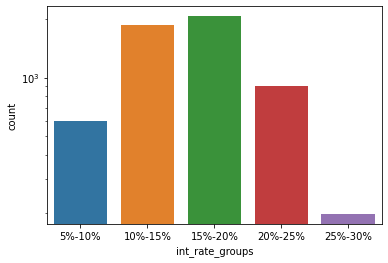

In [32]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='int_rate_groups', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

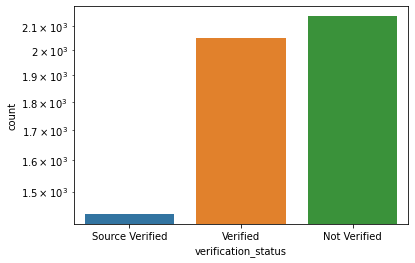

In [33]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set_yscale('log')
sns.countplot(x='verification_status', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

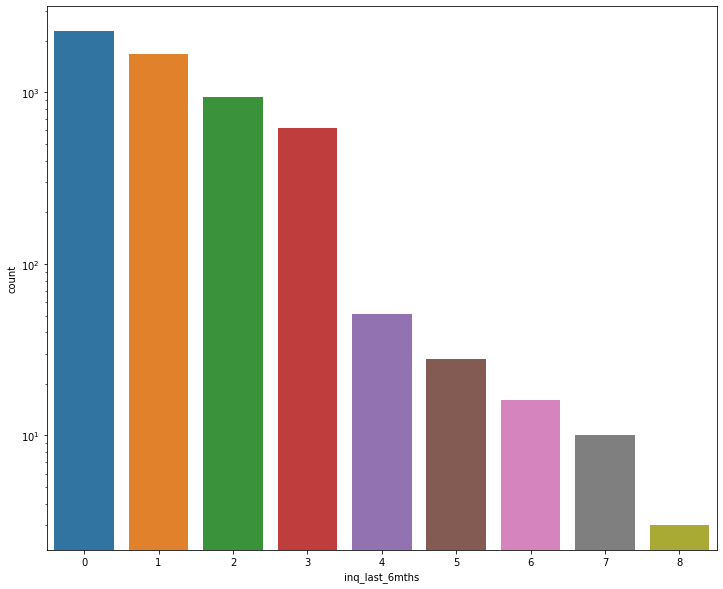

In [34]:
fig,ax = plt.subplots(figsize = (12,10))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan[loan['loan_status']=='Charged Off'])

In [35]:
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

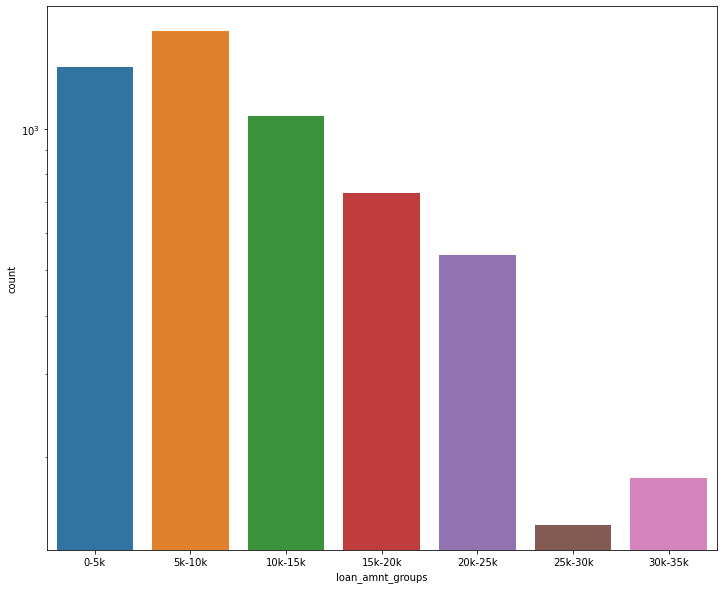

In [36]:
fig,ax = plt.subplots(figsize = (12,10))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='purpose'>

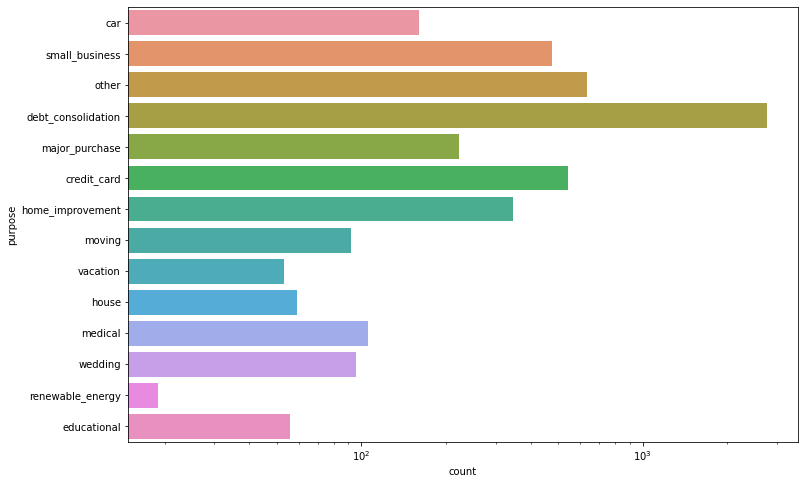

In [37]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])

Analysis - defaulting could happen in below scenarios:

1. For B grade
2. when house ownership would be rent
3. For terms of 36 months
4. For income in range 31201 - 58402
5. For interest rate between 15%-20%
6. For verification status as not verified
7. when number of enquiries in last 6 months is 0
8. For loan amount between 5k to 10k
9. When the purpose is 'debt_consolidation'

# Analysis based on loan amount,Annual income and loan status

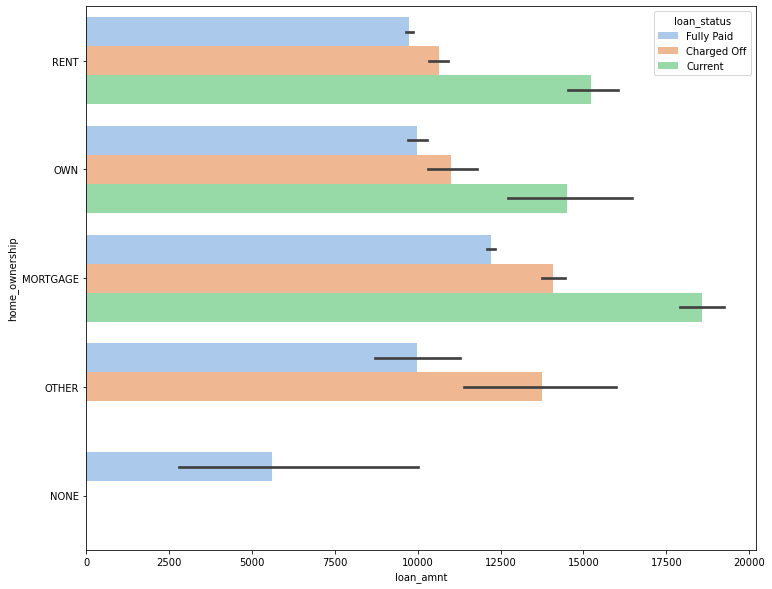

In [38]:
plt.figure(figsize=(12,10))
sns.barplot(data =loan,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

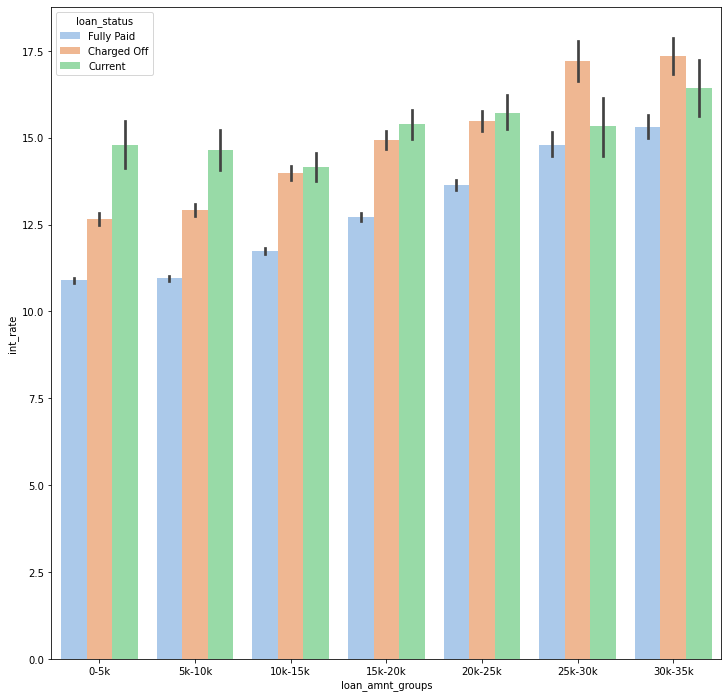

In [39]:
plt.figure(figsize=(12,12))
sns.barplot(data =loan,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

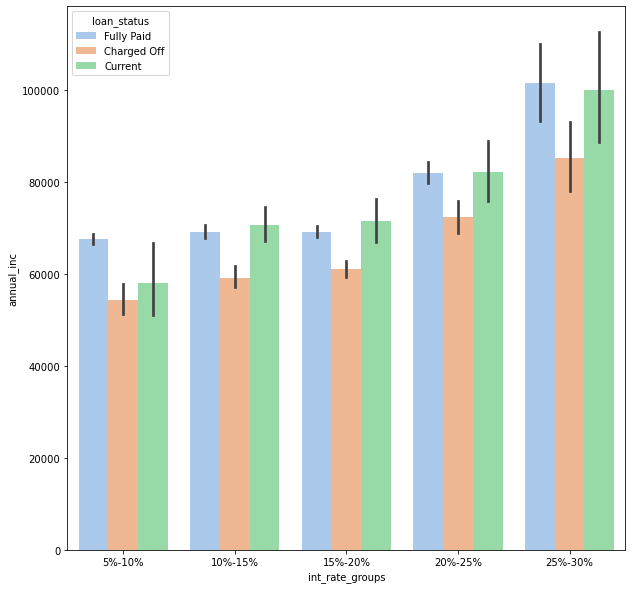

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

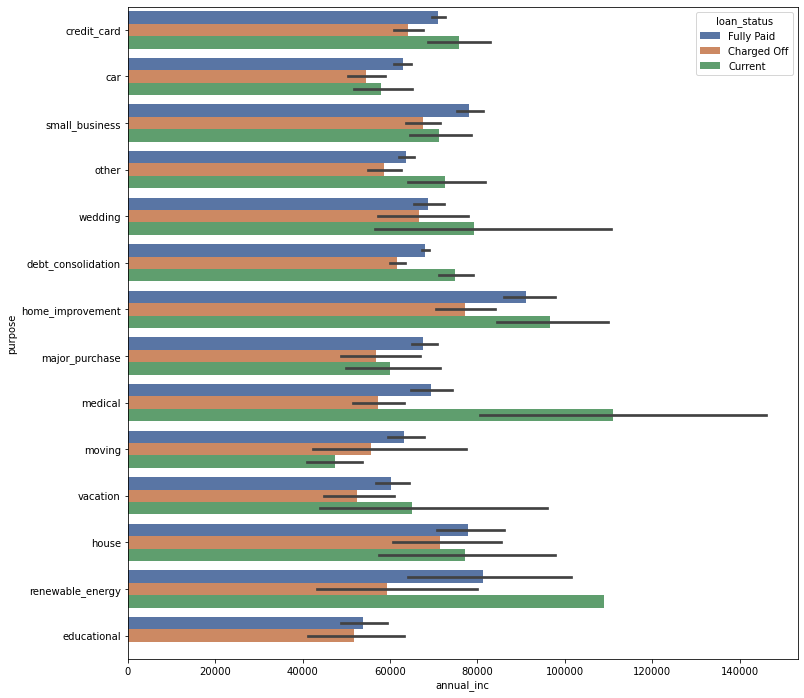

In [41]:
plt.figure(figsize=(12,12))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

Defaulting could happen when 

1. Applicants have home ownership MORTGAGE and took loan of amount in 12k-15k.
2. Applied interest rate is 17.5 for loan amount 30-35k.
3. Interest rate applied 25%-30% and income is 80k to 1 lac.
4. Loan taken for home improvement and income between 80k to 1 lac.

# Correlation Matrix

In [45]:
numeric_columns = ['loan_amnt','emp_length','open_acc','int_rate','installment','annual_inc','dti','pub_rec']

In [46]:
correlation_matrix = loan[numeric_columns].corr()

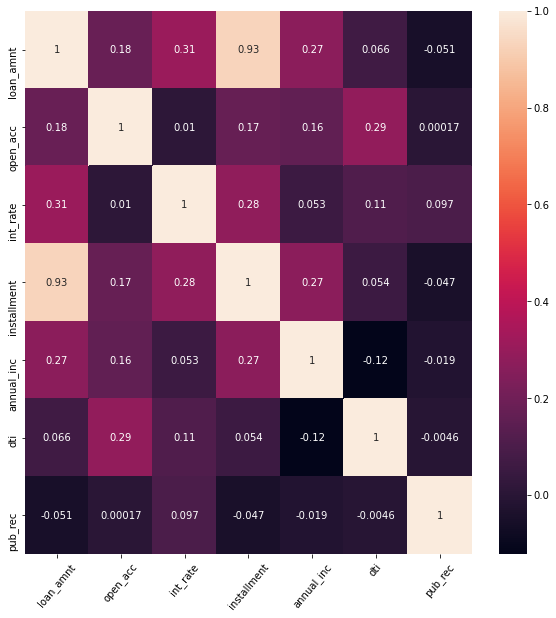

In [49]:
f,ax = plt.subplots(figsize= (10,10))

sns.heatmap(correlation_matrix,xticklabels = correlation_matrix.columns.values,yticklabels= correlation_matrix.columns.values,
           annot = True)
plt.xticks(rotation=50)
plt.show()